# The Sound of Climate Change 

## Data

In [ ]:
import xarray as xr

In [ ]:
data_path = "data/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc"

In [ ]:
ds = xr.open_dataset(data_path)

In [4]:
ds_yearly = ds.groupby('time.year').mean()

In [5]:
anom = ds_yearly['anom'].mean(skipna=True, dim=['lat', 'lon', 'z'])

In [6]:
anom

<xarray.DataArray 'anom' (year: 143)>
array([-0.3943866 , -0.41972142, -0.4036848 , -0.48530814, -0.57469773,
       -0.5889563 , -0.57268155, -0.5909827 , -0.44562352, -0.38252443,
       -0.63903975, -0.52612305, -0.570924  , -0.59950167, -0.5950165 ,
       -0.5180988 , -0.41718104, -0.44207883, -0.56131285, -0.4545371 ,
       -0.4238661 , -0.46986705, -0.60135543, -0.66082263, -0.72585166,
       -0.5568018 , -0.4936252 , -0.6894805 , -0.72841936, -0.75785506,
       -0.7034879 , -0.75667304, -0.6826453 , -0.65288305, -0.4602562 ,
       -0.43005922, -0.6172296 , -0.71297073, -0.59762526, -0.6004663 ,
       -0.59456426, -0.47546577, -0.5666871 , -0.56307   , -0.5301119 ,
       -0.47914082, -0.38606668, -0.4893744 , -0.4795832 , -0.6426879 ,
       -0.4171341 , -0.38618568, -0.42179072, -0.59395295, -0.39917687,
       -0.45938993, -0.40029082, -0.29080656, -0.2633328 , -0.27344295,
       -0.16464116, -0.11016758, -0.20841345, -0.13299076,  0.01565617,
       -0.13738923, -0.37518796, -0.30405325, -0.35113192, -0.35852575,
       -0.4490882 , -0.32934034, -0.27240175, -0.1811699 , -0.3751917 ,
       -0.43210554, -0.45517403, -0.25939453, -0.23247351, -0.24851352,
       -0.2775711 , -0.22983077, -0.22023346, -0.2538945 , -0.48913643,
       -0.41327626, -0.3905886 , -0.2777611 , -0.34331083, -0.2701262 ,
       -0.2839199 , -0.34365183, -0.3231848 , -0.12641443, -0.37112936,
       -0.2359808 , -0.36379242, -0.06907614, -0.20542464, -0.13779244,
       -0.04034564,  0.06257632, -0.15661713,  0.04536498, -0.12573433,
       -0.14191881, -0.09556889, -0.00960468,  0.07597412, -0.00842201,
        0.1378755 ,  0.09291187, -0.09948993, -0.03128164,  0.00182989,
        0.19177724,  0.01640899,  0.18606322,  0.2912497 ,  0.10348047,
        0.11754002,  0.25927433,  0.31287512,  0.3265392 ,  0.24369767,
        0.38980773,  0.3379023 ,  0.38573822,  0.26357874,  0.31855157,
        0.4427373 ,  0.34472087,  0.38057834,  0.3780964 ,  0.42638323,
        0.5900977 ,  0.727808  ,  0.64048296,  0.5329775 ,  0.67719775,
        0.7383068 ,  0.5341347 ,  0.592656  ], dtype=float32)
Coordinates:
  * year     (year) int64 1880 1881 1882 1883 1884 ... 2018 2019 2020 2021 2022

## Sonification

In [7]:
from scisonify import Sonify
from scisonify.core.soundmaps import DiscreteNoteBins

In [8]:
smap = DiscreteNoteBins.from_key("F:min", octave_range=(3, 6))
sonify = Sonify(data=anom, smap=smap)

In [9]:
smap._notes

array(['C3', 'D♭3', 'D3', 'E♭3', 'E3', 'F3', 'G♭3', 'G3', 'A♭3', 'A3',
       'B♭3', 'B3', 'C4', 'D♭4', 'D4', 'E♭4', 'E4', 'F4', 'G♭4', 'G4',
       'A♭4', 'A4', 'B♭4', 'B4', 'C5', 'D♭5', 'D5', 'E♭5', 'E5', 'F5',
       'G♭5', 'G5', 'A♭5', 'A5', 'B♭5', 'B5', 'C6', 'D♭6', 'D6', 'E♭6',
       'E6', 'F6', 'G♭6', 'G6', 'A♭6', 'A6', 'B♭6', 'B6'], dtype='<U3')

In [10]:
sonify.to_audio(note_length=0.10,  wave='sine')

In [11]:
import matplotlib.pyplot as plt

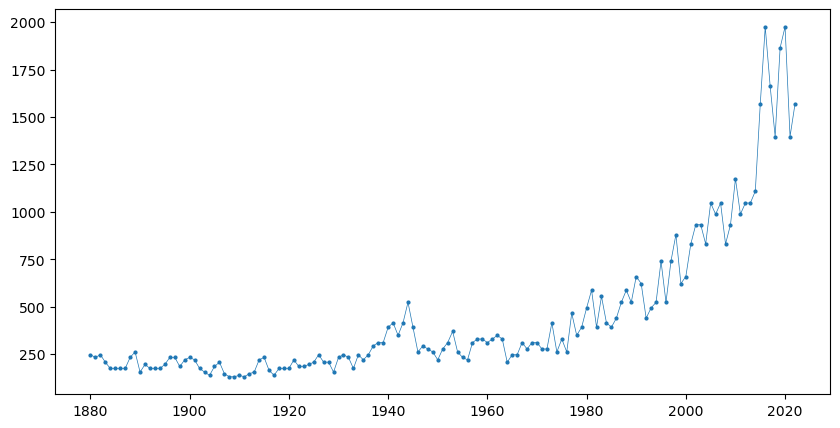

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(ds_yearly.year, sonify.to_frequency(), "o-", ms=2, lw=0.5)